In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# loading dataset
filename = 'iris.data'
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
dataset = pd.read_csv(filename, names=names)

In [3]:
# Dimension of Dataset - shape
print(dataset.shape)

(150, 5)


In [4]:
# Peek at the data - head
print(dataset.head(10))

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [5]:
# Statistical Summary
print(dataset.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [6]:
# class distribution - to check if data is balanced or imbalanced. 
print(dataset.groupby('species').size())

# output shows the data is well balanced.

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


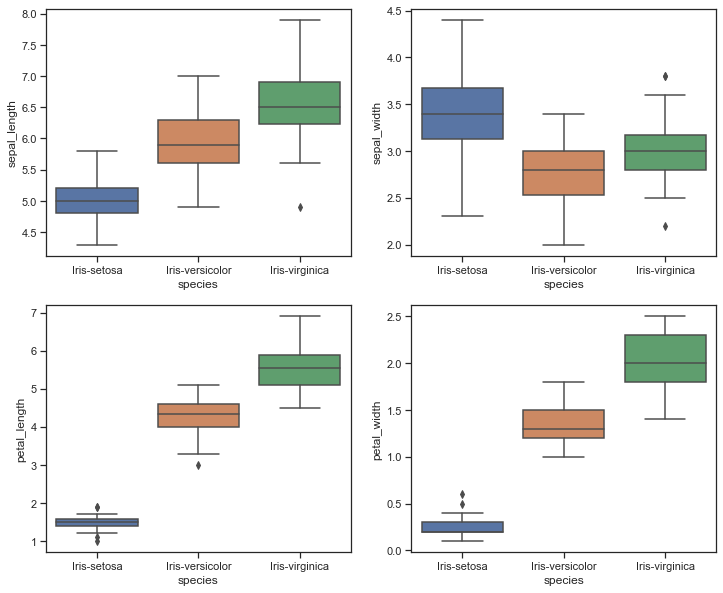

In [7]:
# Data Visualization 
# Univariate plots to better understand each attribute
# Multivariate plots to better understand the relationship between attributes

# box and whisker plots
sns.set(style='ticks')
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)

sns.boxplot(x='species', y='sepal_length', data=dataset)
plt.subplot(2,2,2)

sns.boxplot(x='species', y='sepal_width', data=dataset)
plt.subplot(2,2,3)

sns.boxplot(x='species', y='petal_length', data=dataset)
plt.subplot(2,2,4)

sns.boxplot(x='species', y='petal_width', data=dataset)
plt.show()

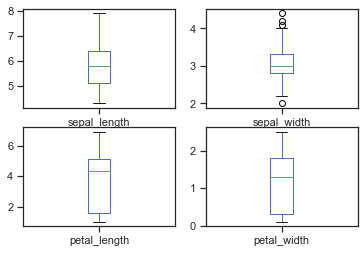

In [8]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

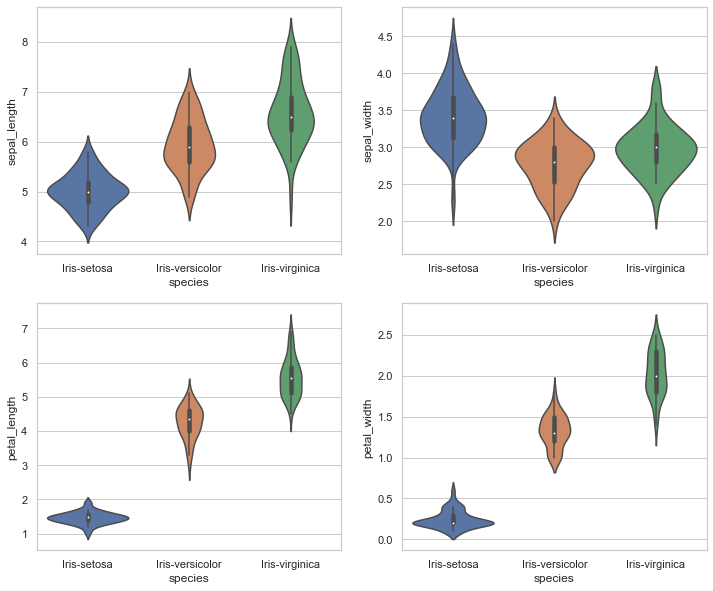

In [9]:
# Plotting Violin plot
sns.set(style="whitegrid")
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)

sns.violinplot(x='species', y='sepal_length', data=dataset)
plt.subplot(2,2,2)

sns.violinplot(x='species', y='sepal_width', data=dataset)
plt.subplot(2,2,3)

sns.violinplot(x='species', y='petal_length', data=dataset)
plt.subplot(2,2,4)

sns.violinplot(x='species', y='petal_width', data=dataset)
plt.show()

In [10]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris_setosa = dataset[dataset["species"] == "Iris-setosa"]
iris_versicolor = dataset[dataset["species"] == "Iris-versicolor"]
iris_virginica = dataset[dataset["species"] == "Iris-virginica"]

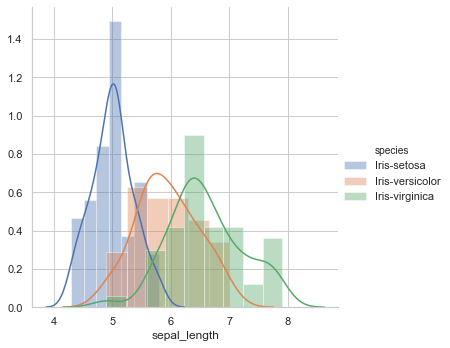

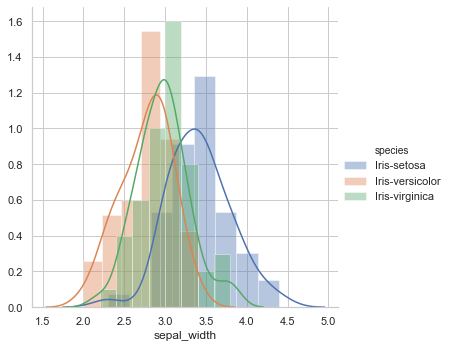

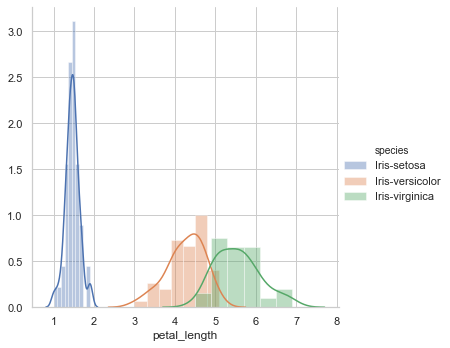

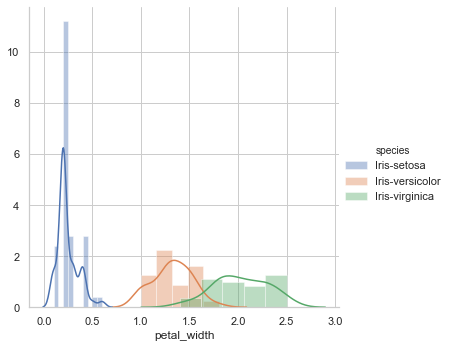

In [12]:
# Plotting the Histogram & PDF 
sns.FacetGrid(dataset, hue='species', height=5)\
    .map(sns.distplot, "sepal_length") \
    .add_legend();

sns.FacetGrid(dataset, hue="species", height=5) \
   .map(sns.distplot, "sepal_width") \
   .add_legend();

sns.FacetGrid(dataset, hue="species", height=5) \
   .map(sns.distplot, "petal_length") \
   .add_legend();

sns.FacetGrid(dataset, hue="species", height=5) \
   .map(sns.distplot, "petal_width") \
   .add_legend();

plt.show()


## Observations:
    1. by using petal length we can separate iris-setosa
    2. by using sepal length,sepal width we can’t do anything because it’s all messed up and we can’t separate the flowers
    3. in petal width iris setosa is not distributed properly
    4. so we are using the petal length as feature to separate at least the iris setosa.

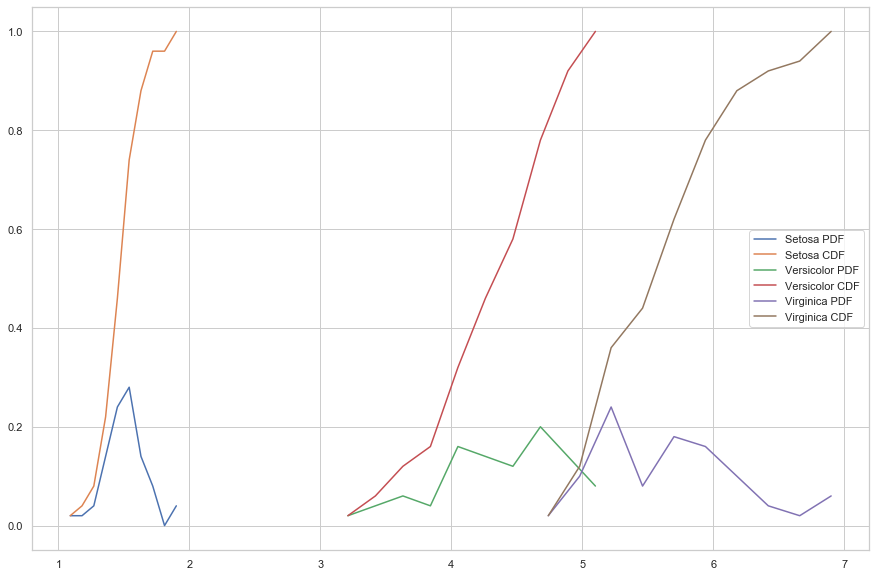

In [13]:
# Using Cumulative Distribution Function (CDF) plots to quantify 
# the proportion of misclassified flowers in above analysis

plt.figure(figsize=(15,10))
counts, bin_edges = np.histogram(iris_setosa['petal_length'],
                                 bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = 'Setosa PDF')
plt.plot(bin_edges[1:], cdf, label = 'Setosa CDF')
counts, bin_edges = np.histogram(iris_versicolor['petal_length'],
                                 bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = 'Versicolor PDF')
plt.plot(bin_edges[1:], cdf, label = 'Versicolor CDF')
counts, bin_edges = np.histogram(iris_virginica['petal_length'],
                                 bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = 'Virginica PDF')
plt.plot(bin_edges[1:], cdf, label = 'Virginica CDF')
plt.legend()
plt.show()


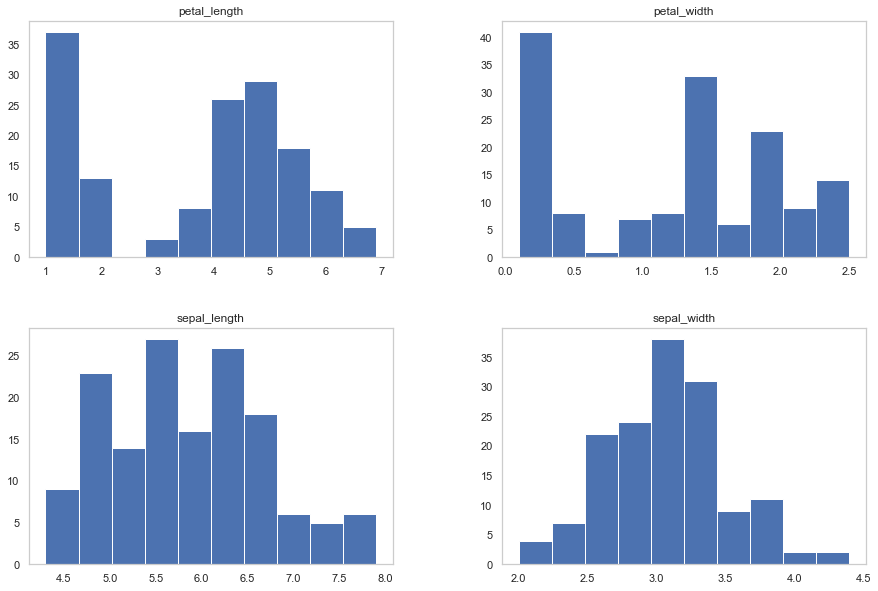

In [14]:
# histograms
dataset.hist(figsize=(15,10), grid=False)
plt.show()

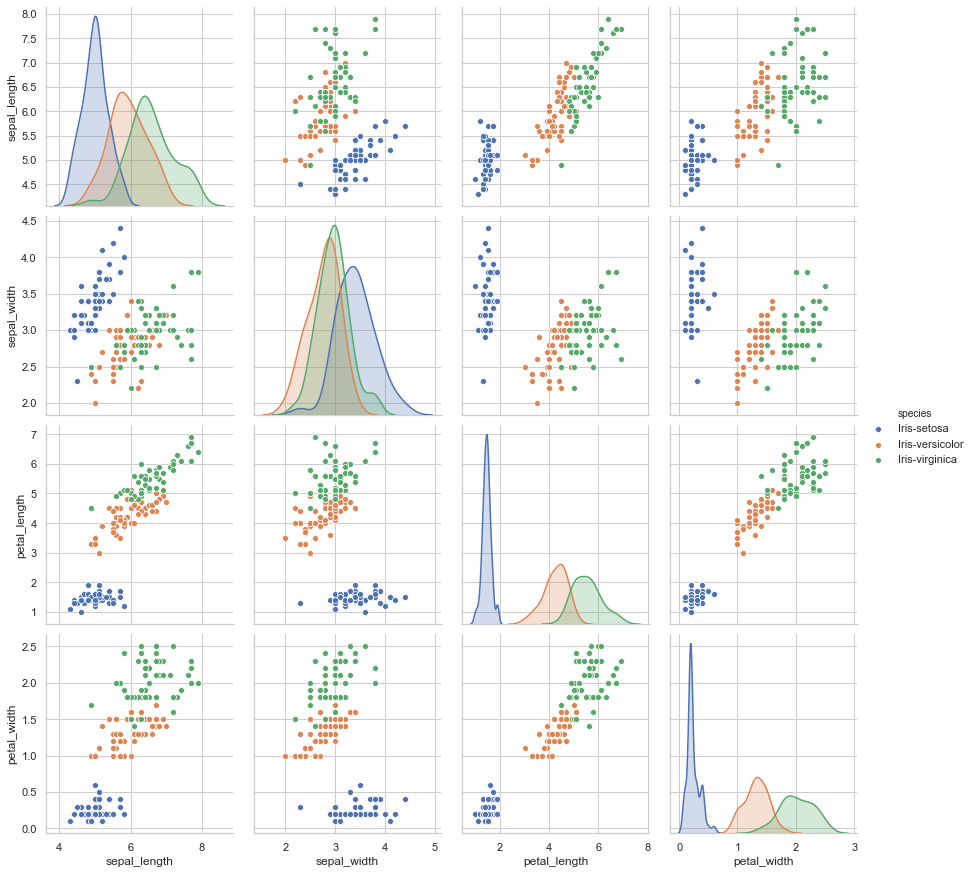

In [15]:
# Multivariate Plots
sns.set_style("whitegrid")
sns.pairplot(dataset,hue="species",height=3);
plt.show()

# Creating Validation Dataset

In [16]:
dataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [17]:
# Splitting the dataset 
array = dataset.values
dataset['species'] = dataset['species'].map({'Iris-setosa': 0,'Iris-versicolor': 1, 'Iris-virginica':2})

x = dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = dataset['species']

validation_size= 0.20
seed = 42

In [18]:
# normalization
x=(x-np.min(x))/(np.max(x)-np.min(x))

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(x, y, test_size=validation_size, random_state=seed)

In [20]:
# Building Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [21]:
# creating classifier 
classifier = LogisticRegression()

In [70]:
# Creating Hyperparameter Search space

# regularization penalty space
penalty_list = ['l1','l2','elasticnet', 'none']

# regularization hyperparameter space
c_values = np.logspace(0,4,10)

# regularization hyperparameter solver
solver_list = ['lbfgs','newton-cg','liblinear', 'sag', 'saga']

# regularization max_iter
max_iter  =[100, 1000,2500, 5000] ;


# final Hyperparameter Options
hyperparameters = dict(penalty = penalty_list, C = c_values, solver = solver_list)

In [71]:
# Creating GridSearch using 10-fold cross validation
clf = GridSearchCV(classifier, hyperparameters, cv=10,scoring ='accuracy',verbose=True, n_jobs = -1 )

In [72]:
# Fit the grid Search
best_model = clf.fit(x,y)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    3.1s finished


In [73]:
print("tuned hyerparameters :(best parameters) ",best_model.best_params_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'none', 'solver': 'lbfgs'}


In [74]:
print("accuracy :",best_model.best_score_)

accuracy : 0.9800000000000001


In [84]:
# Predict target vector
prediction = best_model.predict(X_test)

In [85]:
prediction

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [92]:
from sklearn import metrics
print("accuracy ", metrics.accuracy_score(y_test, prediction))

accuracy  1.0


In [94]:
# training the model with best_parameters obtained by hyerparameters
# creating classifier 
final_clf = LogisticRegression(penalty='none', C=1.0, solver='lbfgs')
model = final_clf.fit(x,y)

In [95]:
y_hat = model.predict(X_test)
y_hat

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [96]:
from sklearn import metrics
print("accuracy ", metrics.accuracy_score(y_test, y_hat))

accuracy  1.0


In [98]:
# saving the model
pkl_model_name = 'iris_logistic_regression.pkl'

# Save to file in the current working directory
import pickle
with open(pkl_model_name, 'wb') as file:
    pickle.dump(model, file)

In [100]:
# Load from file
with open(pkl_model_name, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict target values
score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(X_test)

Test score: 100.00 %


In [104]:
# The Joblib library is intended to be a replacement for Pickle,
# for objects containing large data. We'll repeat the save and restore procedure as with Pickle.

from sklearn.externals import joblib

# Save to file in the current working directory
joblib_file = "joblib_iris_logistic_regression_model.pkl"
joblib.dump(model, joblib_file)


['joblib_iris_logistic_regression_model.pkl']

In [105]:
# Load from file
joblib_model = joblib.load(joblib_file)

# Calculate the accuracy and predictions
score = joblib_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(X_test)

Test score: 100.00 %
